# Linear Models using neural networks

In [1]:
# for tutorial, we will be creating our own dataset, for exercise we will use an actual one
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


torch.manual_seed(42)
np.random.seed(42)

n = 100
area = np.random.uniform(800, 2500, n)
bedrooms = np.random.randint(1, 5, n)
age = np.random.randint(18, 45, n)


price = 50 * area + 10 * bedrooms - 20 * age + np.random.normal(0, 35, n)

data = pd.DataFrame({'area': area, 'bedrooms': bedrooms, 'age': age, 'price': price})
data.head()


,area,bedrooms,age,price
0,1436.718202,3,18,71542.637261
1,2416.214321,4,18,120537.094743
2,2044.389701,3,36,101555.192591
3,1817.719423,1,19,90482.563753
4,1065.231689,4,38,52515.293158


A linear model tries to learn:

price=w1xarea + w2xbedrooms + w3xage+ b

Each input feature gets its own weight.
The model's job is to find the best weights and bias that minimize prediction error.

In [2]:
X = torch.tensor(data[['area', 'bedrooms', 'age']].values, dtype=torch.float32)
y = torch.tensor(data[['price']].values, dtype=torch.float32)
#There are 3 features, so the input shape for each example is [3].

In [3]:
model = nn.Linear(in_features=3, out_features=1)
print(model)


Linear(in_features=3, out_features=1, bias=True)


In [4]:
criterion = nn.L1Loss()  # Mean Absolute Error
optimizer = optim.Adam(model.parameters(), lr=0.1)# try different lr, like 0.01 to 2.0


In [5]:
epochs = 100
#try different training step and see how parmeters come close
# what is shown down is after chaning epochs and lr, in different combinations
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.2f}')


Epoch [20/100], Loss: 75576.95
Epoch [40/100], Loss: 72310.05
Epoch [60/100], Loss: 69043.16
Epoch [80/100], Loss: 65776.27
Epoch [100/100], Loss: 62509.36


## lets see what it learned

In [6]:
for name, param in model.named_parameters():
    print(name, param.data)


weight tensor([[10.4414, 10.4792,  9.8647]])
bias tensor([10.5304])


In [7]:
with torch.no_grad():
    y_pred = model(X)
test_loss = criterion(y_pred, y)
print(f"Test MSE: {test_loss.item():.4f}")

Test MSE: 62346.0156


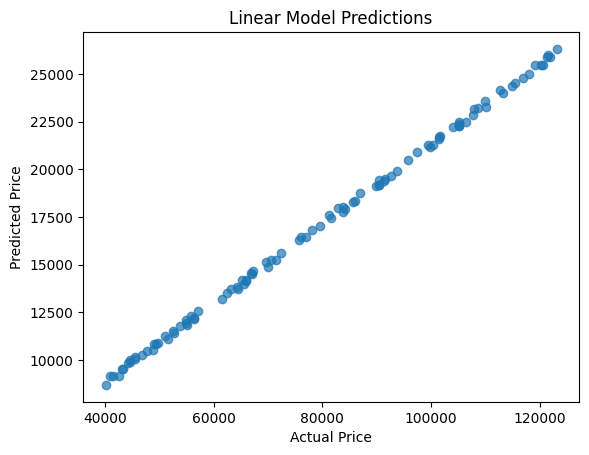

In [8]:
with torch.no_grad():
    y_pred = model(X)

plt.figure(dpi=100)
plt.scatter(y, y_pred, alpha=0.7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Model Predictions")
plt.show()
# why linear and diagonal?

# what we did above was a single layer lets make it deep

In [9]:
price = (
    50 * area
    + 10 * bedrooms
    - 2 * (age**2)  # nonlinear term
    + np.random.normal(0, 20, n)
)

X = torch.tensor(np.column_stack([area, bedrooms, age]), dtype=torch.float32)
y = torch.tensor(price.reshape(-1, 1), dtype=torch.float32)
data = pd.DataFrame({'area': area, 'bedrooms': bedrooms, 'age': age, 'price': price})
data.head()

,area,bedrooms,age,price
0,1436.718202,3,18,71217.521259
1,2416.214321,4,18,120184.064212
2,2044.389701,3,36,99631.586204
3,1817.719423,1,19,90171.868787
4,1065.231689,4,38,50373.685206


In [10]:
class DeepModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(3, 64),
            nn.ReLU(),
            nn.Linear(64, 16),
            nn.ReLU(),
            nn.Linear(16, 1)
        )

    def forward(self, x):
        return self.net(x)

deep_model = DeepModel()
print(deep_model)


DeepModel(
  (net): Sequential(
    (0): Linear(in_features=3, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)


In [11]:
criterion = nn.L1Loss()
optimizer = optim.Adam(deep_model.parameters(), lr=0.01)

epochs = 5000
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = deep_model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.2f}')


Epoch [100/5000], Loss: 1535.94
Epoch [200/5000], Loss: 966.86
Epoch [300/5000], Loss: 527.60
Epoch [400/5000], Loss: 287.04
Epoch [500/5000], Loss: 572.92
Epoch [600/5000], Loss: 316.11
Epoch [700/5000], Loss: 290.72
Epoch [800/5000], Loss: 270.77
Epoch [900/5000], Loss: 282.02
Epoch [1000/5000], Loss: 277.37
Epoch [1100/5000], Loss: 248.33
Epoch [1200/5000], Loss: 242.28
Epoch [1300/5000], Loss: 249.33
Epoch [1400/5000], Loss: 241.63
Epoch [1500/5000], Loss: 241.88
Epoch [1600/5000], Loss: 267.27
Epoch [1700/5000], Loss: 230.14
Epoch [1800/5000], Loss: 224.08
Epoch [1900/5000], Loss: 341.81
Epoch [2000/5000], Loss: 331.86
Epoch [2100/5000], Loss: 298.87
Epoch [2200/5000], Loss: 252.58
Epoch [2300/5000], Loss: 270.64
Epoch [2400/5000], Loss: 267.82
Epoch [2500/5000], Loss: 249.43
Epoch [2600/5000], Loss: 290.74
Epoch [2700/5000], Loss: 248.75
Epoch [2800/5000], Loss: 266.17
Epoch [2900/5000], Loss: 230.93
Epoch [3000/5000], Loss: 233.39
Epoch [3100/5000], Loss: 238.82
Epoch [3200/5000

In [12]:
for name, param in deep_model.named_parameters():
    print(name, param.data)


net.0.weight tensor([[-1.2650e-01,  1.1650e-01, -2.8109e-01],
        [ 8.6811e-01,  1.5900e+00, -2.1686e+00],
        [ 9.0421e-01,  1.0430e+00, -1.3982e+00],
        [ 6.1135e-01,  1.3678e+00, -1.7915e+00],
        [ 9.1277e-01,  1.0991e+00, -2.0710e+00],
        [ 6.5477e-01,  7.9347e-01, -1.8147e+00],
        [-2.3450e-01,  3.8300e-01, -4.5574e-01],
        [-2.6616e-01, -1.6303e-01, -3.4714e-01],
        [ 4.9574e-01,  4.0988e-01, -1.2242e+00],
        [-4.9044e-01,  4.4573e-01,  9.6082e-02],
        [-1.8747e-01,  3.5677e-01,  8.9980e-02],
        [ 9.9011e-01,  1.1291e+00, -1.9105e+00],
        [ 4.5842e-01,  7.0866e-01, -1.6932e+00],
        [ 9.5328e-01,  1.3179e+00, -2.0811e+00],
        [ 7.7699e-01,  1.0856e+00, -1.4905e+00],
        [-3.5190e-01, -5.7152e-01, -2.2307e-01],
        [-4.4284e-01,  4.7374e-01,  1.6629e-01],
        [ 7.0192e-01,  1.1951e+00, -1.7914e+00],
        [ 9.7994e-01,  6.5407e-01, -1.6815e+00],
        [-3.9406e-01,  1.7803e-01, -1.9883e-01],
       

In [13]:
with torch.no_grad():
    y_pred = deep_model(X)
test_loss = criterion(y_pred, y)
print(f"Test MSE: {test_loss.item():.4f}")

Test MSE: 228.5412


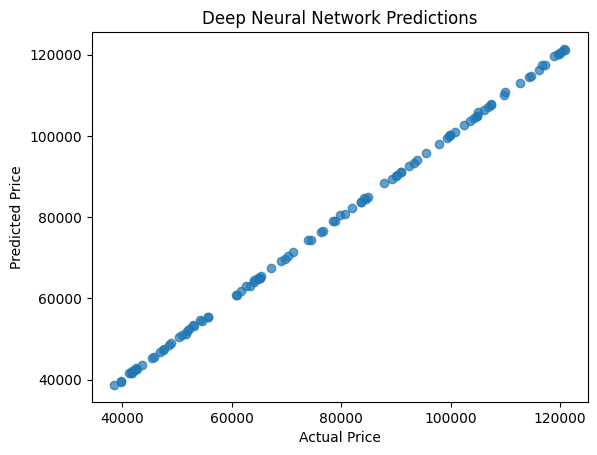

In [14]:
with torch.no_grad():
    y_pred = deep_model(X)

plt.figure(dpi=100)
plt.scatter(y, y_pred, alpha=0.7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Deep Neural Network Predictions")
plt.show()


# Exercise: Neural Network on Iris Dataset
1. Iris dataset is already loaded for you, it  and check the shapes.
2. Check if you need to preprocess the inputs (e.g., scaling).
3. Split the data into training and test sets.
4. Define a neural network appropriate for the task.
5. Use a suitable loss function(crossentropyloss) and an optimizer.
6. Train the model on the training set.
7. Evaluate it on the test set and report accuracy.

In [15]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target


Dataset Information:
Input shape: (150, 4)
Output shape: (150,)
Number of classes: 3
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']

Training set size: 120
Test set size: 30

Model Architecture:
IrisClassifier(
  (net): Sequential(
    (0): Linear(in_features=4, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=3, bias=True)
  )
)

Training started...
Epoch [100/1000], Loss: 0.0358
Epoch [200/1000], Loss: 0.0256
Epoch [300/1000], Loss: 0.0224
Epoch [400/1000], Loss: 0.0215
Epoch [500/1000], Loss: 0.0211
Epoch [600/1000], Loss: 0.0208
Epoch [700/1000], Loss: 0.0206
Epoch [800/1000], Loss: 0.0205
Epoch [900/1000], Loss: 0.0204
Epoch [1000/1000], Loss: 0.0202

Training completed!

TEST SET RESULTS
Accuracy: 93.33%
Correct predictions: 28/30

Per-class accuracy:
  setosa: 100.00%

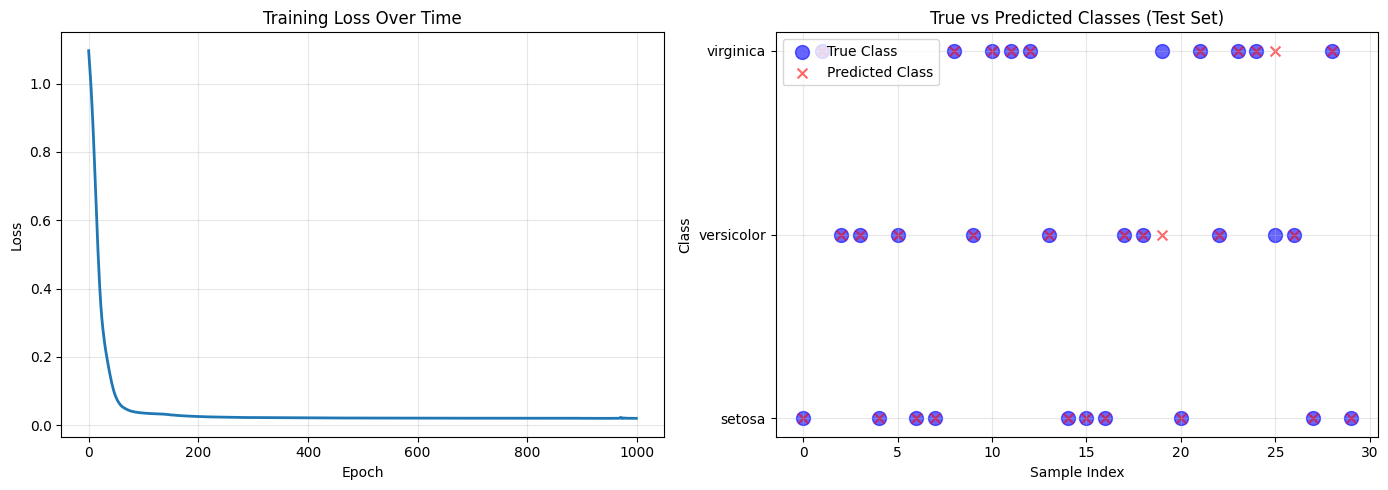


Exercise completed successfully!


In [16]:
# Exercise: Neural Network on Iris Dataset
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Set seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# 1. Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

print("Dataset Information:")
print(f"Input shape: {X.shape}")  # (150, 4) - 150 samples, 4 features
print(f"Output shape: {y.shape}")  # (150,) - 150 labels
print(f"Number of classes: {len(np.unique(y))}")  # 3 classes
print(f"Feature names: {iris.feature_names}")
print(f"Target names: {iris.target_names}\n")

# 2. Preprocess: Scale the inputs (important for neural networks!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Split into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)  # long for classification
y_test = torch.tensor(y_test, dtype=torch.long)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}\n")

# 4. Define the Neural Network
class IrisClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(4, 16),      # 4 input features -> 16 neurons
            nn.ReLU(),
            nn.Linear(16, 8),      # 16 -> 8 neurons
            nn.ReLU(),
            nn.Linear(8, 3)        # 8 -> 3 output classes
        )
    
    def forward(self, x):
        return self.net(x)

model = IrisClassifier()
print("Model Architecture:")
print(model)
print()

# 5. Define loss function and optimizer
criterion = nn.CrossEntropyLoss()  # For multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 6. Train the model
epochs = 1000
loss_history = []

print("Training started...")
for epoch in range(epochs):
    # Forward pass
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    loss_history.append(loss.item())
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

print("\nTraining completed!\n")

# 7. Evaluate on test set
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    # Get predictions
    test_outputs = model(X_test)
    _, predicted = torch.max(test_outputs, 1)  # Get class with highest probability
    
    # Calculate accuracy
    correct = (predicted == y_test).sum().item()
    total = y_test.size(0)
    accuracy = 100 * correct / total
    
    print("="*50)
    print("TEST SET RESULTS")
    print("="*50)
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"Correct predictions: {correct}/{total}")
    
    # Detailed breakdown by class
    print("\nPer-class accuracy:")
    for i, class_name in enumerate(iris.target_names):
        class_mask = (y_test == i)
        class_correct = ((predicted == y_test) & class_mask).sum().item()
        class_total = class_mask.sum().item()
        class_acc = 100 * class_correct / class_total if class_total > 0 else 0
        print(f"  {class_name}: {class_acc:.2f}% ({class_correct}/{class_total})")

# Visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Training loss
axes[0].plot(loss_history, linewidth=2)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Training Loss Over Time')
axes[0].grid(True, alpha=0.3)

# Plot 2: Confusion-like visualization
with torch.no_grad():
    test_outputs = model(X_test)
    probabilities = torch.softmax(test_outputs, dim=1)
    
axes[1].scatter(range(len(y_test)), y_test, c='blue', alpha=0.6, 
                label='True Class', s=100, marker='o')
axes[1].scatter(range(len(predicted)), predicted, c='red', alpha=0.6, 
                label='Predicted Class', s=50, marker='x')
axes[1].set_xlabel('Sample Index')
axes[1].set_ylabel('Class')
axes[1].set_title('True vs Predicted Classes (Test Set)')
axes[1].set_yticks([0, 1, 2])
axes[1].set_yticklabels(iris.target_names)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("Exercise completed successfully!")
print("="*50)